# BIO101 Epidemiology  Assignment
### By Kartikey Sharma and Surya Shukla

In [ ]:
#installing the covirsphy package from github
pip install "git+https://github.com/lisphilar/covid19-sir#egg=covsirphy"

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')  #to ignore the cases where division by 0 occurs

# ML Supervised learning libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [2]:
# importing data

# The Day 1 is starting from 26/2/2020 (26th February 2020)

d=pd.read_csv("C:/Users/uttam/anaconda3/BIOProj/GithubData.csv")
d.tail(10)

,Province_State,Country_Region,Days Passed,Infected,Deaths,Recovered,Active,Fatal per Confirmed,Recovered per Confirmed,Fatal per(Fatal or recovered),Growth Rate,Daily Confirmed,Population,Susceptible
95,South Carolina,US,96,16441,588,7928,7925.0,0.035764,0.482209,0.069047,1.284369,682,5150000,5125631
96,South Carolina,US,97,17170,593,8682,7895.0,0.034537,0.505649,0.063935,1.068915,729,5150000,5124148
97,South Carolina,US,98,17955,599,8682,8674.0,0.033361,0.483542,0.064540,1.076818,785,5150000,5123363
98,South Carolina,US,99,18795,600,8682,9513.0,0.031923,0.461931,0.064641,1.070064,840,5150000,5122523
99,South Carolina,US,100,19378,602,8682,10094.0,0.031066,0.448034,0.064843,0.694048,583,5150000,5121940
100,South Carolina,US,101,19990,607,9734,9649.0,0.030365,0.486943,0.058698,1.049743,612,5150000,5120276
101,South Carolina,US,102,20556,617,9734,10205.0,0.030016,0.473536,0.059608,0.924837,566,5150000,5119710
102,South Carolina,US,103,21533,621,9734,11178.0,0.028839,0.452050,0.059971,1.726148,977,5150000,5118733
103,South Carolina,US,104,22608,639,10790,11179.0,0.028264,0.477265,0.055910,1.100307,1075,5150000,5116602
104,South Carolina,US,105,23756,644,10790,12322.0,0.027332,0.467173,0.055392,1.322199,1148,5150000,5115454


In [54]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Province_State                 115 non-null    object 
 1   Country_Region                 115 non-null    object 
 2   Days Passed                    115 non-null    int64  
 3   Confirmed                      115 non-null    int64  
 4   Deaths                         115 non-null    int64  
 5   Recovered                      115 non-null    int64  
 6   Active                         70 non-null     float64
 7   Fatal per Confirmed            115 non-null    float64
 8   Recovered per Confirmed        115 non-null    float64
 9   Fatal per(Fatal or recovered)  115 non-null    float64
 10  Growth Rate                    115 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 10.0+ KB


There is missing data(45)in the 'Active' column

In [7]:
d.corr()

,Days Passed,Confirmed,Deaths,Recovered,Active,Fatal per Confirmed,Recovered per Confirmed,Fatal per(Fatal or recovered),Growth Rate
Days Passed,1.000000,0.947394,0.969241,0.969697,0.658614,0.832491,0.739097,0.761112,0.032683
Confirmed,0.947394,1.000000,0.970190,0.986679,0.832050,0.639572,0.544387,0.578144,0.004197
Deaths,0.969241,0.970190,1.000000,0.987837,0.607036,0.739060,0.595938,0.638104,0.000380
Recovered,0.969697,0.986679,0.987837,1.000000,0.750166,0.710982,0.615412,0.607588,-0.002946
Active,0.658614,0.832050,0.607036,0.750166,1.000000,-0.504813,-0.493897,-0.122698,-0.008890
Fatal per Confirmed,0.832491,0.639572,0.739060,0.710982,-0.504813,1.000000,0.919793,0.914847,0.035162
Recovered per Confirmed,0.739097,0.544387,0.595938,0.615412,-0.493897,0.919793,1.000000,0.824171,0.015925
Fatal per(Fatal or recovered),0.761112,0.578144,0.638104,0.607588,-0.122698,0.914847,0.824171,1.000000,0.085039
Growth Rate,0.032683,0.004197,0.000380,-0.002946,-0.008890,0.035162,0.015925,0.085039,1.000000


The correlation between Confirmed and Days Passed,Death and Days Passed,Recovered and Days Passed,Confirmed and Deaths, Confirmed and Recovered,Recovered and Deaths is VERY HIGH. This implies that they are heavily correlated.

## Visualising Data with respect to Days Passed

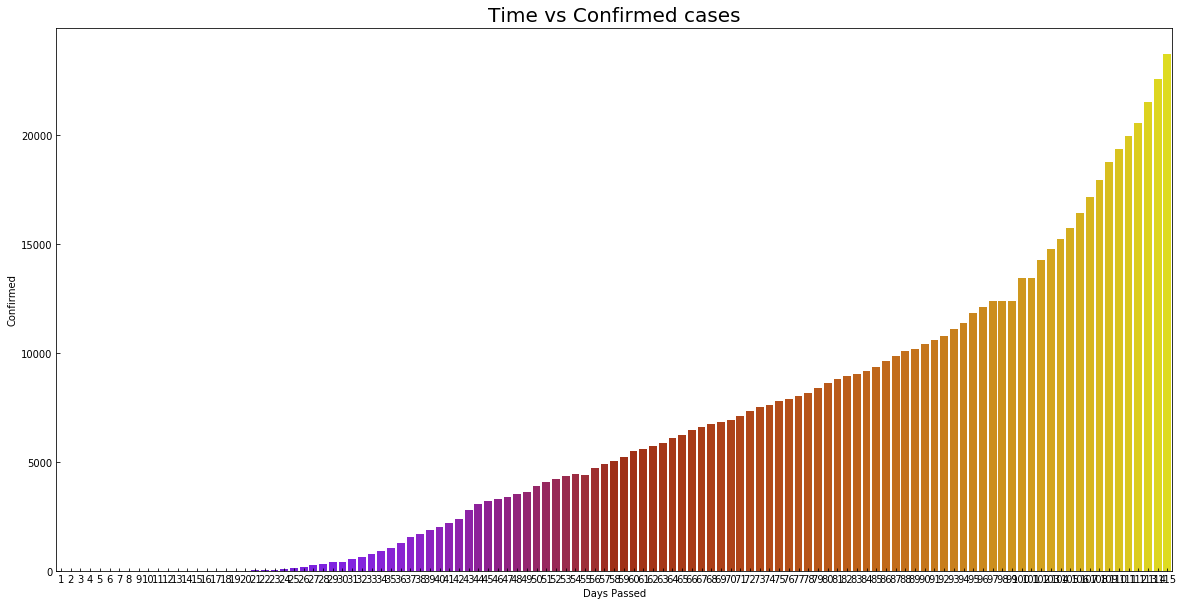

In [97]:
# confirmed cases
plt.figure(figsize=(20,10))
plt.title("Time vs Confirmed cases",fontsize=20)
sns.barplot(data=d, y="Confirmed",x='Days Passed',palette='gnuplot')
plt.show()

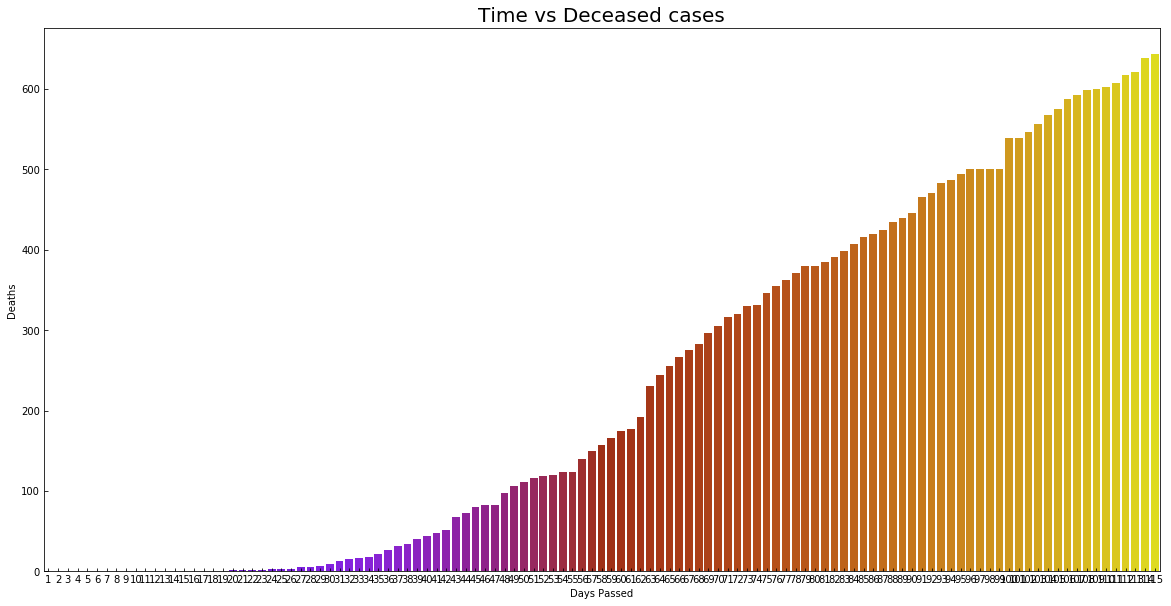

In [56]:
# deceased cases
plt.figure(figsize=(20,10))
plt.title("Time vs Deceased cases",fontsize=20)
sns.barplot(data=d, y="Deaths",x='Days Passed',palette='gnuplot')
plt.show()

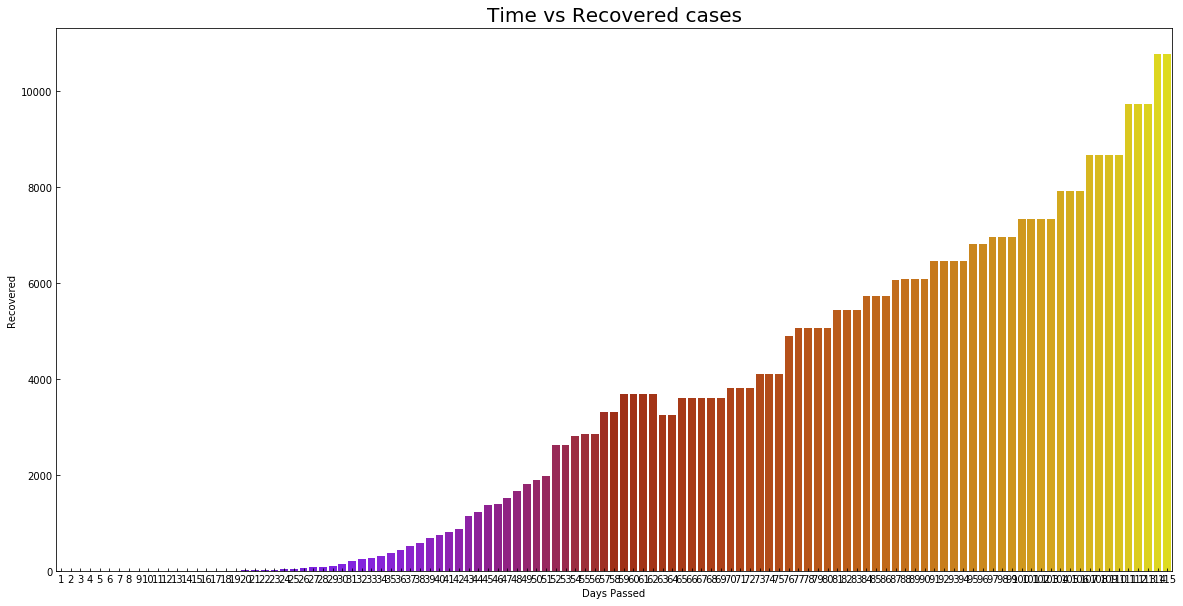

In [57]:
#recovered cases
plt.figure(figsize=(20,10))
plt.title("Time vs Recovered cases",fontsize=20)
sns.barplot(data=d, y="Recovered",x='Days Passed',palette='gnuplot')
plt.show()

## Visualising Together

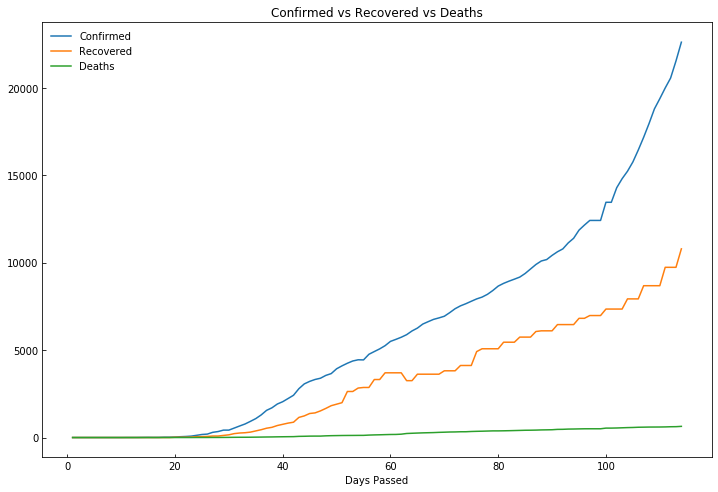

In [12]:
#Plotting all three columns together
d[0:114].plot(x='Days Passed', y=["Confirmed","Recovered","Deaths"] ,figsize=(12,8), grid=False,title="Confirmed vs Recovered vs Deaths")
plt.show()

Clearly, Suuth Carolina's number of infected people's curve has not peaked.. and as the recovered curve has not crossed the confirmed curve, the situation is still an outbreak

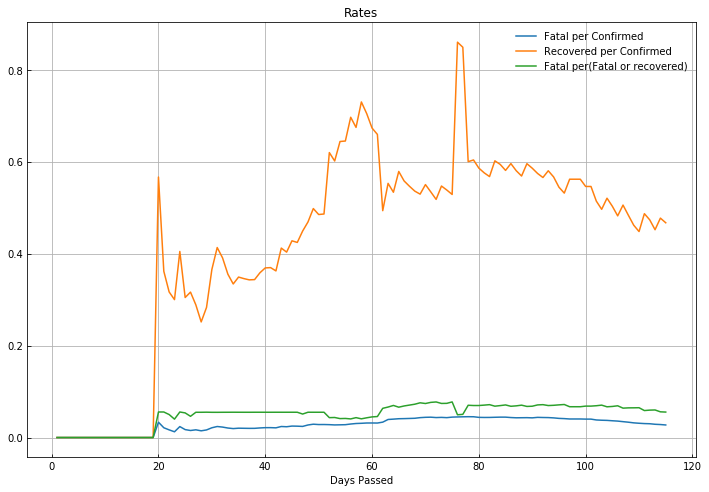

In [13]:
# Plotting the rates of fatality and recovery

d[0:].plot(x='Days Passed', y=["Fatal per Confirmed","Recovered per Confirmed","Fatal per(Fatal or recovered)"] ,figsize=(12,8), grid=True,title="Rates")
plt.show()

## Growth factor
Where  C  is the number of confirmed cases,<br>
Growth Factor =ΔC(n)/ΔC(n−1)

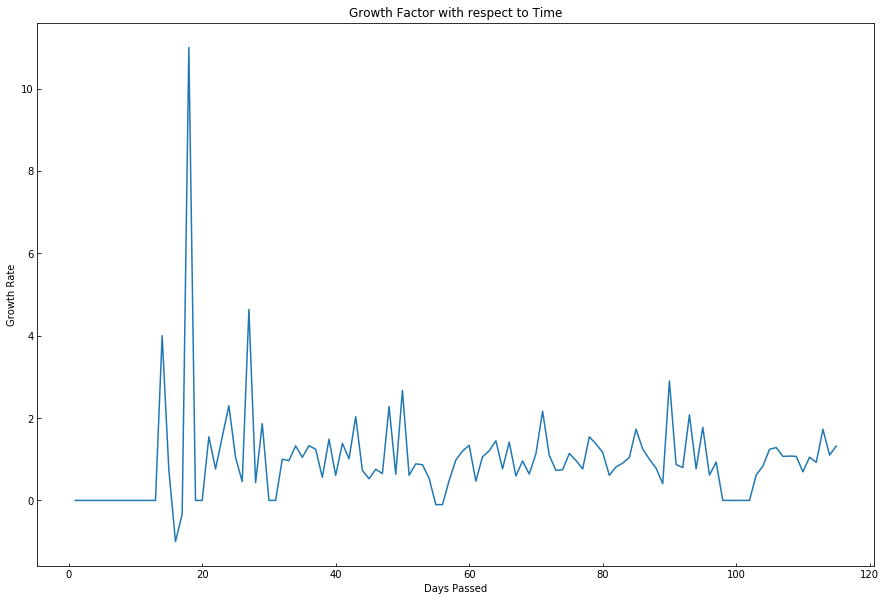

In [14]:
plt.figure(figsize=(15,10))
plt.title("Growth Factor with respect to Time")
sns.lineplot(data=d,y='Growth Rate',x='Days Passed')
plt.show()

We see that eventually,the growth rate is approaching 1, ie, earlier there was an outbreak of the coronavirus in South Carolina, but it stabilised with time.

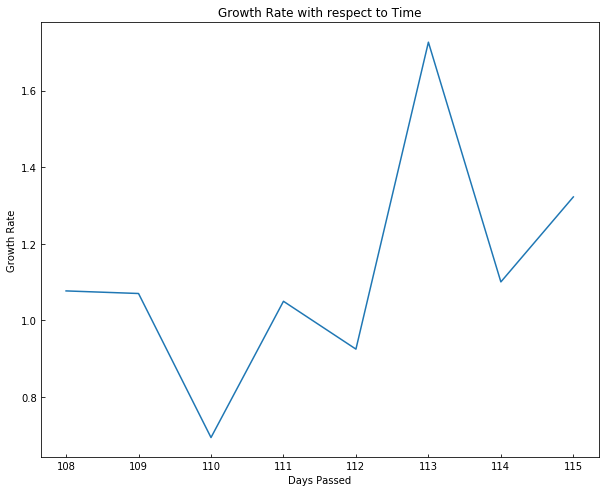

In [15]:
# last 7 days
plt.figure(figsize=(10,8))
plt.title("Growth Rate with respect to Time")
sns.lineplot(data=d[107:],y='Growth Rate',x='Days Passed')
plt.show()

## ==============================EDA ENDS================================

# SIR COVID Model

There's a lot of information to be extracted from this data; for example, we haven't analyzed the effects of long/lat of countries. However, since our main purpose is to develop a predective model in order to understand the key factors that impact the COVID-19 transmission, we will use the SIR model.<br><br>
SIR is a simple model that considers a population that belongs to one of the following states:<br>

1.  Susceptible (S). The individual hasn't contracted the disease, but she can be infected due to transmisison from infected people<br>
2.  Infected (I). This person has contracted the disease<br>
3.  Recovered/Deceased (R). The disease may lead to one of two destinies: either the person survives, hence developing inmunity to the disease, or the person is deceased.<br>

## Defining parameters

In [4]:
# Susceptible equation
def fs(N, a, b, beta):
    dsdt = -beta*a*b
    return dsdt

# Infected equation
def fi(N, a, b, beta, gamma):
    didt =  beta*a*b - gamma*b
    return didt

# Recovered/deceased equation
def fr(N, b, gamma):
    drdt = gamma*b
    return drdt

I preferred to use the <b>Runge Kutta method</b> to solve the SIR model as it is widely used and I found the below online resource particularly helpful<br>
https://blog.tonytsai.name/blog/2014-11-24-rk4-method-for-solving-sir-model/

## Runge Kutta Function Definition

The Runge-Kutta method finds approximate value of y for a given x. Only first order ordinary differential equations can be solved by using the Runge Kutta 4th order method.

In [5]:
# Defining the Runge Kutta function (4th order to solve for 3 dimensions (S(t),I(t),R(t)))

def rungekutta(N, a, b, c, fs, fi, fr, beta, gamma, hs):
    a1 = fs(N, a, b, beta)*hs
    b1 = fi(N, a, b, beta, gamma)*hs
    c1 = fr(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fs(N, ak, bk, beta)*hs
    b2 = fi(N, ak, bk, beta, gamma)*hs
    c2 = fr(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fs(N, ak, bk, beta)*hs
    b3 = fi(N, ak, bk, beta, gamma)*hs
    c3 = fr(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fs(N, ak, bk, beta)*hs
    b4 = fi(N, ak, bk, beta, gamma)*hs
    c4 = fr(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

## Parameters and their definitions

N = Total population<br>
Beta = Rate of transition from Susceptible to Infected (S->I)<br>
Gamma = Rate of transition from Infected to Recovered/Deceased (I->R)<br>
K =  denotes the constant degree distribution of the network (average value for networks in which the probability of finding a node with a different connectivity decays exponentially fast<br>
hs = jump step of the numerical integration<br>

### Definining SIR Model function


In [6]:

def sirmodel (N, b0, beta, gamma, hs):
     
    # Initial condition
    a = float(N-1)/N - b0   #Susceptible fraction of population considering only 1 person is initiallly infected
    b = float(1)/N + b0
    c = 0.0

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rungekutta(N, a, b, c, fs, fi, fr, beta, gamma, hs)

    return sus, inf, rec

### Sample Example of SIR Model

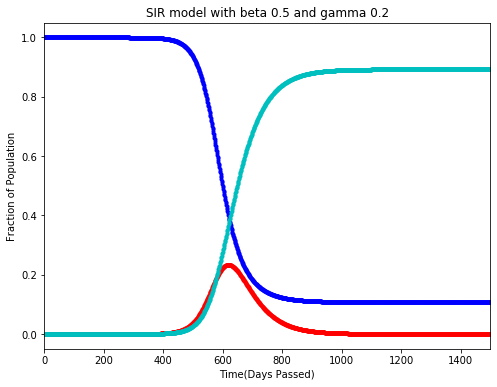

In [7]:
# Values (Just to showcase an example)
N = 7800*(10**4)       
b0 = 0              # Initial fraction of population infected (In factors of N)    
beta = 0.5           
gamma = 0.2            
hs = 0.1

sus, inf, rec = sirmodel(N, b0, beta, gamma, hs)

plt.figure(figsize=(8,6)) 
plt.title("SIR model with beta "+str(beta)+" and gamma "+str(gamma))

plt.plot(sus, 'b.', label='Susceptible (S)');
plt.plot(inf, 'r.', label='Infected (I)');
plt.plot(rec, 'c.', label='Recovered/deceased (R)');
plt.xlabel("Time(Days Passed)", fontsize=10);
plt.ylabel("Fraction of Population", fontsize=10);
plt.xlim(0,1500)
plt.show()

## ========================================================================

## Fitting SIR Paramaters to South Carolina Dataset

In [8]:
d.Active.fillna(0)            # Filling missing values in Active column to 0 


0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
100     9649.0
101    10205.0
102    11178.0
103    11179.0
104    12322.0
Name: Active, Length: 105, dtype: float64

## CURVE FITTING

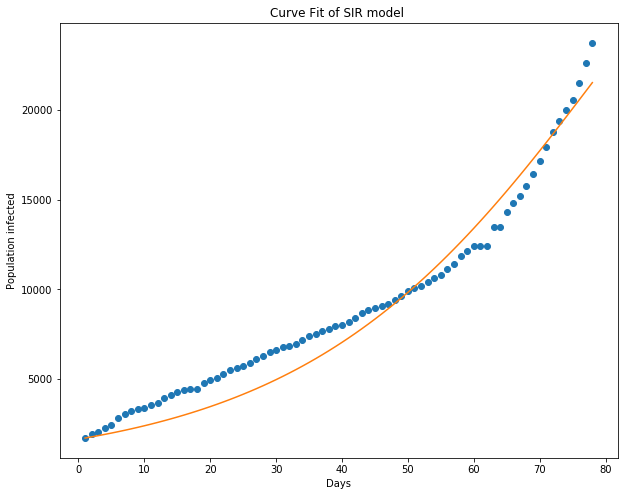

Optimal parameters: beta = 0.3495254812527788  and gamma =  0.10387727709107177


In [9]:
population = float(5150000)   #Population of south carolina

country_df = pd.DataFrame()
country_df['ConfirmedCases'] = d['Infected']
country_df = country_df[27:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)


plt.figure(figsize=(10,8))
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Curve Fit of SIR model ")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1]/3)

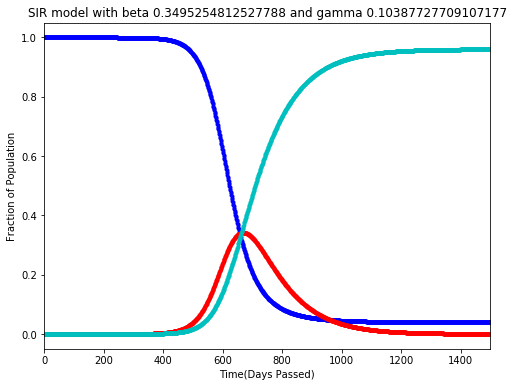

In [11]:

N = 5150000       
b0 = 0              # Initial fraction of population infected (In factors of N)    
beta = 0.3495254812527788         
gamma = 0.10387727709107177    
hs = 0.1

sus, inf, rec = sirmodel(N, b0, beta, gamma, hs)

plt.figure(figsize=(8,6)) 
plt.title("SIR model with beta "+str(beta)+" and gamma "+str(gamma))


plt.plot(sus, 'b.', label='Susceptible (S)');
plt.plot(inf, 'r.', label='Infected (I)');
plt.plot(rec, 'c.', label='Recovered/deceased (R)')
plt.xlabel("Time(Days Passed)", fontsize=10)
plt.ylabel("Fraction of Population", fontsize=10)
plt.xlim(0,1500)
plt.show()

## LOGISTIC Regression (Predicted what the classicial SIR model predicted)

Days after which infected curve hits inflection point is   : 164.4
Maximum number of infected people are                      : 165015


[]

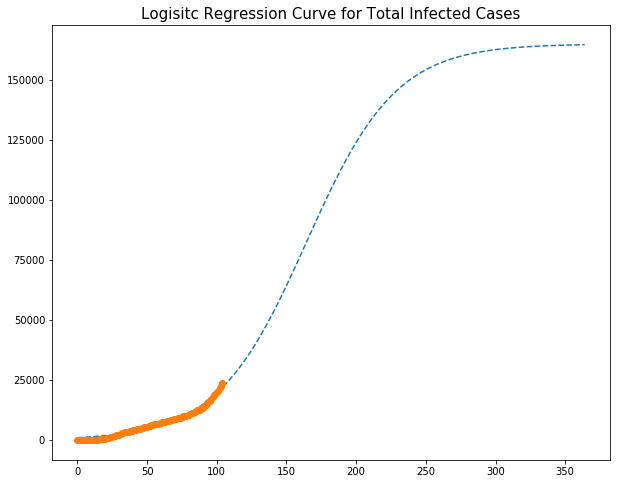

In [81]:
from scipy.optimize import curve_fit

x_data = range(len(d.index))
y_data = d['Infected']

def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=50000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(range(0,365), k, x_0, ymax)
#print("Optimal K obtained is                                      : "+str(k))
print("Days after which infected curve hits inflection point is   : "+str(round(x_0,1)))
print("Maximum number of infected people are                      : "+str(int(ymax)))


fig = plt.figure(figsize=(10,8))
plt.title("Logisitc Regression Curve for Total Infected Cases",fontsize=15)
ax.legend()
ax = fig.add_subplot(111)
ax.plot(range(0,365), y_fitted, '--', label='Fitted Curve')
ax.plot(x_data, y_data, 'o', label='Confirmed Data')
ax.plot()

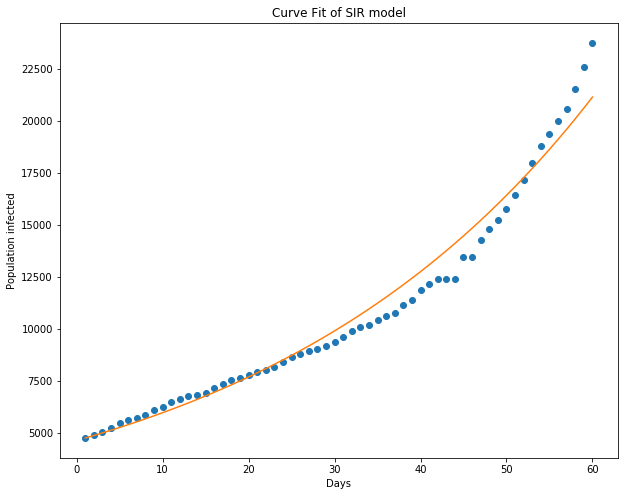

Optimal parameters: beta = 0.005009228773500736  and gamma =  -0.02026429828301016


In [92]:
population = float(5150000)   #Population of south carolina

country_df = pd.DataFrame()
country_df['ConfirmedCases'] = d['Infected']
country_df = country_df[45:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

beta=0
gamma=0.1
def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.figure(figsize=(10,8))
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Curve Fit of SIR model")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

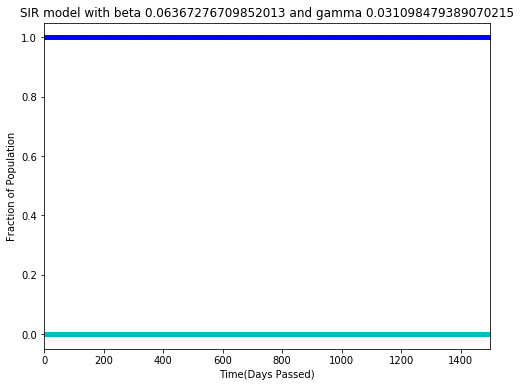

In [80]:
rho= 1577169.2522
N = 5150000      
b0 = 0              # Initial fraction of population infected (In factors of N)              
gamma =  0.031098479389070215   
beta = 0.06367276709852013
hs = 0.1

sus, inf, rec = sirmodel(N, b0, beta, gamma, hs)

plt.figure(figsize=(8,6)) 
plt.title("SIR model with beta "+str(beta)+" and gamma "+str(gamma))

plt.plot(sus, 'b.', label='Susceptible (S)');
plt.plot(inf, 'r.', label='Infected (I)');
plt.plot(rec, 'c.', label='Recovered/deceased (R)');
plt.xlabel("Time(Days Passed)", fontsize=10);
plt.ylabel("Fraction of Population", fontsize=10);
plt.xlim(0,1500)
plt.show()

## Clearly, the two advanced algorithms did not work. Hence, I had to proceed with the conventional maths as suggested in the Google Classroom video lectures

### -------------------------------------------------------------END OF NOTEBOOK--------------------------------------------------------------------